# 4.2
## 1.
### Imports

In [12]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Obter série de anos

In [13]:
seed_value = 100
years = pd.Series([i for i in range(1900, 2021)])
sampleyears1 = years.sample(n=30, replace=False, random_state=seed_value)

# Ler os dados

In [14]:
dados_lidos = pd.read_csv("CO_data.csv")

# Obter dados dos anos pretendidos para Portugal e Hungria

In [15]:
# Definição das condições de filtragem.
condicao_anos = dados_lidos.year.isin(list(sampleyears1))
condicao_PT = dados_lidos.country == "Portugal"
condicao_HU = dados_lidos.country == "Hungary"

# Extrair dos dados lidos, os dados de trabalho de acordo com as condições de filtro.
dados_PT = dados_lidos.loc[condicao_PT & condicao_anos, ["year", "gdp"]]
dados_HU = dados_lidos.loc[condicao_HU & condicao_anos, ["year", "gdp"]]

## Tratar dos NaN

Optámos por remover.

In [16]:
dados_PT_na = dados_PT.dropna()
dados_HU_na = dados_HU.dropna()

# Gráficos dos dados

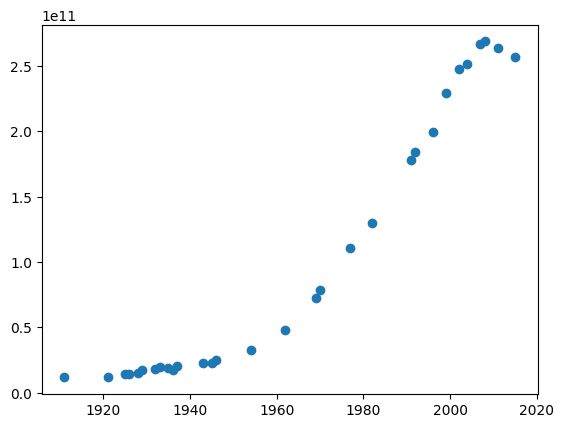

In [17]:
plt.scatter(dados_PT_na["year"], dados_PT_na["gdp"])

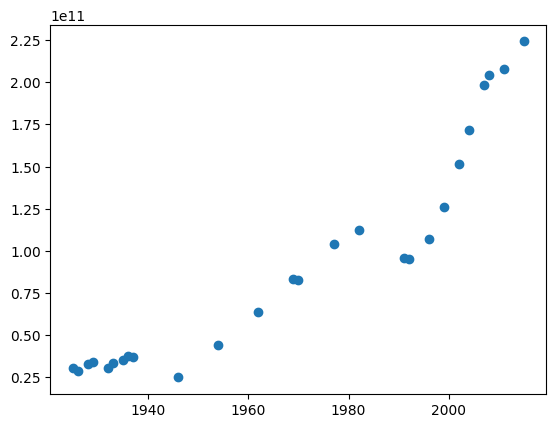

In [18]:
plt.scatter(dados_HU_na["year"], dados_HU_na["gdp"])

# Cálcular a média amostral

In [19]:
# Média amostral de Portugal.
media_PT = dados_PT["gdp"].mean(axis=0)
print(f"Média amostral de Portugal: {media_PT:.4e}")

# Média amostral da Hungria.
media_HU = dados_HU["gdp"].mean(axis=0)
print(f"Média amostral da Hungria: {media_HU:.4e}")

Média amostral de Portugal: 1.0234e+11
Média amostral da Hungria: 9.2188e+10


# Calcular a variância

In [20]:
variancia_PT = dados_PT["gdp"].var(axis=0)
print(f"Variância para os dados de Portugal: {variancia_PT:.3e}")
variancia_HU = dados_HU["gdp"].var(axis=0)
print(f"Variância para os dados de Hungria: {variancia_HU:.3e}")

Variância para os dados de Portugal: 1.019e+22
Variância para os dados de Hungria: 4.227e+21


# Normalidade

Este teste pode ser dispensado porque a amostra é de 30 valores, que é o limite para a utilização do teste *t-student*. 

In [24]:
statval_PT, p_value_PT = stats.normaltest(dados_PT["gdp"],  nan_policy="omit")
print(f"Portugal - pvalue: {p_value_PT:.3}")

statval_HU, p_value_HU = stats.normaltest(dados_HU["gdp"], nan_policy="omit")
print(f"Hungria - pvalue: {p_value_HU:.3}")


Portugal - pvalue: 0.0038
Hungria - pvalue: 0.17


Como o *p-value* de Portugal é inferior a 5% os dados não seguem distribuição normal.
Como o *p-value* da Hungria é superior a 5% os dados seguem distribuição normal. 

# Teste
Utilizaçao de *t-student* à média, para amostras emparelhadas (dizem respeito aos mesmos anos).

## Hipotese

$$H_0: \bar X_{PT} \geq \bar X_{HU} \quad Vs \quad H_0: \bar X_{PT} < \bar X_{HU}$$

In [22]:
resultado = stats.ttest_rel(dados_PT["gdp"], dados_HU["gdp"], nan_policy="omit", alternative="greater")
print(f"O valor de pvalue é {resultado.pvalue:.4f}")

O valor de pvalue é 0.0076


Como o valor do *p-value* é inferior a 0,05 rejeitamos a hipotese de que a média do GDP de Portugal é superior à média da Hungria.